In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
nhanes = pd.read_csv("CSVs/nhanes_2015_2016.csv")

In [9]:
nhanes.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


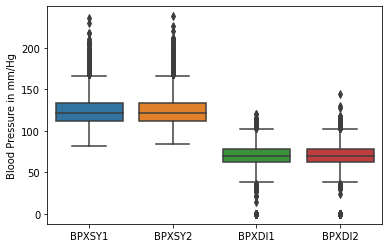

In [10]:
bloodp = sns.boxplot(data=nhanes.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
x = bloodp.set_ylabel("Blood Pressure in mm/Hg")

<AxesSubplot:xlabel='age group', ylabel='BPXSY1'>

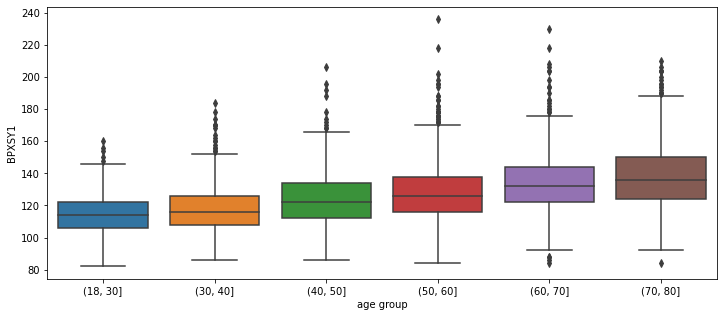

In [11]:
nhanes["age group"] = pd.cut(nhanes.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="age group", y="BPXSY1", data=nhanes) 
#nhanes.groupby()

<AxesSubplot:xlabel='age group', ylabel='BPXSY1'>

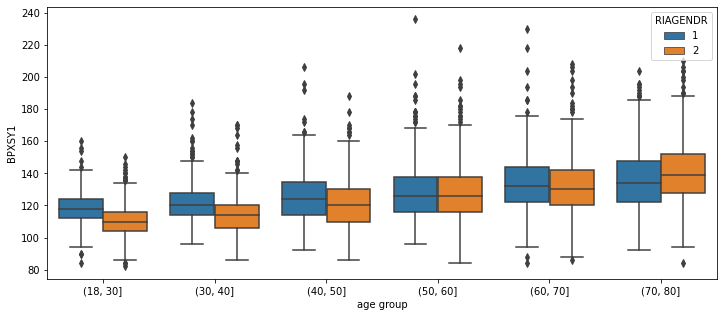

In [12]:
nhanes["age group"] = pd.cut(nhanes.RIDAGEYR,[18,30,40,50,60,70,80])
plt.figure(figsize=(12,5))
sns.boxplot(x="age group", y="BPXSY1", hue="RIAGENDR", data=nhanes)

# Question 1 #
Relabel the marital status variable DMDMARTL to have brief but informative character labels. Then construct a (1.)frequency table of these values for all people, (2.)then for women only, and for (3.)men only. Then construct these three frequency tables using only people whose (4.)age is between 30 and 40.

In [13]:
#1
nhanes["age_group"] = pd.cut(nhanes.RIDAGEYR, [30,40])

nhanes["Martial_Status"] = nhanes.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 
                                       6: "Living with partner", 99: "Don't know", 77:"Refused"}).fillna("Missing")

nhanes["Gender"] = nhanes.RIAGENDR.replace({1: "Male", 2: "Female"})
nhanes["MS_30_40"] = nhanes.age_group.dropna()
nhanes.Martial_Status.value_counts()

Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: Martial_Status, dtype: int64

In [14]:
#2 e 3
nhanes["age_group"] = pd.cut(nhanes.RIDAGEYR, [30,40])

nhanes["Martial_Status"] = nhanes.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 
                                       6: "Living with partner", 99: "Don't know", 77:"Refused"}).fillna("Missing")

nhanes["Gender"] = nhanes.RIAGENDR.replace({1: "Male", 2: "Female"})
nhanes["MS_30_40"] = nhanes.age_group.dropna()

nhanes.groupby("Gender")["Martial_Status"].value_counts()


Gender  Martial_Status     
Female  Married                1303
        Never Married           520
        Divorced                350
        Widowed                 296
        Living with partner     262
        Missing                 126
        Separated               118
        Refused                   1
Male    Married                1477
        Never Married           484
        Living with partner     265
        Divorced                229
        Missing                 135
        Widowed                 100
        Separated                68
        Refused                   1
Name: Martial_Status, dtype: int64

In [40]:
#4
nhanes["age_group"] = pd.cut(nhanes.RIDAGEYR, [30,40])

nhanes["Martial_Status"] = nhanes.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 
                                       6: "Living with partner", 99: "Don't know", 77:"Refused"}).dropna()
                                       
nhanes["Gender"] = nhanes.RIAGENDR.replace({1: "Male", 2: "Female"})
nhanes["MS_30_40"] = nhanes.age_group.dropna()

nhanes.groupby("Gender")["Martial_Status"].value_counts()                                    

Gender  Martial_Status     
Female  Married                1303
        Never Married           520
        Divorced                350
        Widowed                 296
        Living with partner     262
        Separated               118
        Refused                   1
Male    Married                1477
        Never Married           484
        Living with partner     265
        Divorced                229
        Widowed                 100
        Separated                68
        Refused                   1
Name: Martial_Status, dtype: int64

In [39]:
#2 e 3
nhanes["age_group"] = pd.cut(nhanes.RIDAGEYR, [30,40])

nhanes["Martial_Status"] = nhanes.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 
                                       6: "Living with partner", 99: "Don't know", 77:"Refused"}).dropna()

nhanes["Gender"] = nhanes.RIAGENDR.replace({1: "Male", 2: "Female"})
nhanes["MS_30_40"] = nhanes.age_group.dropna()

x = nhanes.Martial_Status.value_counts()
y = nhanes.MS_30_40.value_counts()
print(x)
print(y)
#nhanes.groupby(["Gender","Martial_Status"])["MS_30_40"].value_counts()
#plt.figure(figsize=(12, 5))
#sns.boxplot(x="x", y="MS_30_40", hue="Gender", data=nhanes)

Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: Martial_Status, dtype: int64
(30, 40]    932
Name: MS_30_40, dtype: int64
